# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from sklearn.metrics import roc_auc_score, roc_curve,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Reading Lending_TRAINING_DATA.csv

In [2]:
df = pd.read_csv("Lending_TRAINING_DATA.csv")
df.shape



(7759, 46)

In [3]:
df['PRIMARY.ASSET.MODELNO'].value_counts(dropna=False)

KLV-40W562D                            187
UA32K5300ARLXL                         143
REFRIGERATORS VANILLA                  142
GL-U372HPBL                            137
K1110 FM                               111
200 GENIUS CLS PLUS 4S WINE FIESTA      90
32LN4900                                89
AIR CONDITIONER VANILLA                 74
RR2115CCASA/TL                          70
RD EdgePro 190CT 5.2 LUSH Win           63
PANEL - LED VANILLA                     61
AR12JC3HATPNNA                          59
T7208TDDLP                              55
FTKS50FVMA-RKS50FVMA                    55
43LH520T                                55
RT30K3723S8/HL                          55
LSA24VTDH                               55
RT34K3923BS/HL                          55
TH-32C200DX                             53
SW ULTRA PEARL WINE 6.2KG               48
RAU021AWXA                              47
UA22F5100ARLXL                          45
LED-3222                                44
GL-B201ASAW

In [4]:
df['APPLICATION.STATUS'].value_counts()

Approved    4437
Declined    3322
Name: APPLICATION.STATUS, dtype: int64

In [5]:
col= df.columns
col

Index(['APPLICATION.ID', 'DSA.ID', 'DEALER.ID', 'APP.DATE', 'TIME.STAMP',
       'APPLICATION.STATUS', 'QUEUE.ID', 'CURRENT.STAGE', 'MARITAL.STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE.TYPE', 'CITY', 'STATE',
       'ZIP.CODE', 'EMPLOY.CONSTITUTION', 'NET.TAKE.HOME.SALARY', 'PAN.STATUS',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT', 'ASSET.MAKE',
       'ASSET.CTG', 'APPLIED.AMOUNT', 'LOAN.TENOR', 'LOAN.TYPE',
       'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE',
       'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.YEAR.IN.BUSINESS',
       'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY',
       'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE', 'PRIMARY.ASSET.MODELNO',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK'],
      dtype='object')

In [6]:
df['QUEUE.ID'].value_counts()

Straight  Through Process    5372
Under.Writer                 2387
Name: QUEUE.ID, dtype: int64

In [7]:
df['CURRENT.STAGE'].value_counts()

PD_DE        2556
DCLN         2123
APRV         1107
INV_GNR       856
LOS_DISB      730
SRNV          295
LOS_BDE        86
LOS_ERROR       6
Name: CURRENT.STAGE, dtype: int64

In [8]:
df[(df['APPLICATION.STATUS']=='Approved') ]['CURRENT.STAGE'].value_counts()

PD_DE        1359
APRV         1107
INV_GNR       856
LOS_DISB      729
SRNV          295
LOS_BDE        86
LOS_ERROR       5
Name: CURRENT.STAGE, dtype: int64

In [9]:
df[(df['APPLICATION.STATUS']=='Declined') ]['CURRENT.STAGE'].value_counts()

DCLN         2123
PD_DE        1197
LOS_ERROR       1
LOS_DISB        1
Name: CURRENT.STAGE, dtype: int64

In [10]:
null_col=[]
more_null=[]
for i in col:
    
    if(df[i].isnull().sum()>0):
        print(i," ", df[i].isnull().sum())
        
        null_col.append(i)
        if(df[i].isnull().sum()>7000):
            more_null.append(i)
        
print(null_col)   
print("moe than 7000: :",more_null) 

NET.TAKE.HOME.SALARY   7156
PAN.STATUS   1
APPLICATION.SCORE   3
RESIDENTIAL.ADDRESS.SCORE   1624
OFFICE.ADDRESS.SCORE   1623
NAME.SCORE   5372
APPROVED.AMOUNT   4421
ASSET.MAKE   4421
ASSET.CTG   4421
DEDUPE.REF.ID1   7740
CAR.CATEGORY   7753
OWN.HOUSE.TYPE   3956
HOUSE.SURROGATE.DOCUMENT.TYPE   3956
TRADER.YEAR.IN.BUSINESS   7661
TRADER.BUSINESS.PROOF   7661
CREDIT.CARD.NUMBER   7399
CREDIT.CARDS.CATEGORY   7399
['NET.TAKE.HOME.SALARY', 'PAN.STATUS', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT', 'ASSET.MAKE', 'ASSET.CTG', 'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.YEAR.IN.BUSINESS', 'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY']
moe than 7000: : ['NET.TAKE.HOME.SALARY', 'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'TRADER.YEAR.IN.BUSINESS', 'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY']


In [11]:
df['CURRENT.STAGE'].value_counts()

PD_DE        2556
DCLN         2123
APRV         1107
INV_GNR       856
LOS_DISB      730
SRNV          295
LOS_BDE        86
LOS_ERROR       6
Name: CURRENT.STAGE, dtype: int64

In [12]:
df1 = df.drop(['CITY','STATE','APPLICATION.ID','LOAN.TYPE'],axis =1)
df1.shape

(7759, 42)

In [13]:
df2 = df1.drop(['NET.TAKE.HOME.SALARY', 'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'TRADER.YEAR.IN.BUSINESS',
              'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY','ASSET.MAKE',
              'ASSET.CTG','APPROVED.AMOUNT'],axis =1)
df2.shape

(7759, 32)

In [14]:
df2.columns

Index(['DSA.ID', 'DEALER.ID', 'APP.DATE', 'TIME.STAMP', 'APPLICATION.STATUS',
       'QUEUE.ID', 'CURRENT.STAGE', 'MARITAL.STATUS', 'GENDER', 'AGE',
       'EDUCATION', 'RESIDENCE.TYPE', 'ZIP.CODE', 'EMPLOY.CONSTITUTION',
       'PAN.STATUS', 'CIBIL.SCORE', 'APPLICATION.SCORE',
       'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE',
       'APPLIED.AMOUNT', 'LOAN.TENOR', 'OWN.HOUSE.TYPE',
       'HOUSE.SURROGATE.DOCUMENT.TYPE', 'PRIMARY.ASSET.CTG',
       'PRIMARY.ASSET.MAKE', 'PRIMARY.ASSET.MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK'],
      dtype='object')

In [15]:
numerical = [var for var in df2.columns if df2[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
null_num=[]
for i in numerical:
    
    if(df2[i].isnull().sum()>0):
        print(i," ", df2[i].isnull().sum())
        
        null_num.append(i)
print(null_num)  

There are 8 numerical variables
RESIDENTIAL.ADDRESS.SCORE   1624
OFFICE.ADDRESS.SCORE   1623
NAME.SCORE   5372
['RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE']


In [16]:
for i in null_num:
    df2.loc[df2[i]=='',[i] ]= np.NaN
    df2[i].fillna(value =df2[i].median(),  inplace = True)
    df2[i].value_counts(dropna=False)


In [17]:
numerical

['DEALER.ID',
 'AGE',
 'ZIP.CODE',
 'RESIDENTIAL.ADDRESS.SCORE',
 'OFFICE.ADDRESS.SCORE',
 'NAME.SCORE',
 'APPLIED.AMOUNT',
 'LOAN.TENOR']

In [18]:
df2.loc[df2['RESIDENTIAL.ADDRESS.SCORE']=='',['RESIDENTIAL.ADDRESS.SCORE'] ]= np.NaN
df2['RESIDENTIAL.ADDRESS.SCORE'].fillna(value =df2['RESIDENTIAL.ADDRESS.SCORE'].median(),  inplace = True)
df2['RESIDENTIAL.ADDRESS.SCORE'].value_counts(dropna=False)

74.34     1630
0.00      1171
75.00       40
66.67       30
80.00       21
83.33       21
85.71       19
87.50       14
70.00       13
72.73       13
76.92       12
77.78       12
81.82       11
81.25       11
71.43       10
78.38       10
80.65       10
100.00      10
73.33        9
76.98        9
80.77        9
82.61        9
61.54        8
73.68        8
84.38        8
79.17        8
81.40        8
82.08        8
90.70        8
90.91        8
79.79        8
80.67        8
74.83        8
78.95        8
73.53        8
74.81        8
76.19        8
88.89        8
79.86        7
84.62        7
71.88        7
85.00        7
70.63        7
78.57        7
93.08        7
82.14        7
81.58        7
74.58        7
77.50        7
90.84        7
91.67        7
50.00        7
78.63        7
73.94        7
76.00        7
77.27        7
74.10        7
85.19        7
72.22        7
75.47        6
76.03        6
89.47        6
72.09        6
73.65        6
81.36        6
88.03        6
84.17     

In [19]:

df2.loc[df2['OFFICE.ADDRESS.SCORE']=='',['OFFICE.ADDRESS.SCORE'] ]= np.NaN
df2['OFFICE.ADDRESS.SCORE'].fillna(value =df2['OFFICE.ADDRESS.SCORE'].median(),  inplace = True)
df2['OFFICE.ADDRESS.SCORE'].value_counts(dropna=False)

0.000      2343
58.205     1623
66.670       34
75.000       22
71.430       18
83.330       15
60.000       15
50.000       14
80.000       12
85.710       10
62.500       10
76.470        9
73.680        8
57.140        8
64.000        8
68.750        8
70.000        8
76.920        8
55.560        8
77.780        7
74.580        7
58.540        7
73.330        7
69.230        7
65.220        7
72.730        7
79.170        7
61.540        7
62.040        7
64.760        6
67.500        6
75.890        6
52.380        6
67.590        6
84.620        6
73.640        6
67.860        6
78.260        6
72.220        6
65.000        6
57.020        6
88.890        6
80.950        6
81.820        6
56.060        6
55.170        6
71.130        6
55.000        6
65.380        6
76.000        5
57.690        5
53.280        5
78.870        5
71.760        5
58.330        5
65.060        5
56.250        5
63.640        5
71.720        5
66.940        5
64.290        5
83.190        5
87.500  

In [20]:
df2.loc[df2['NAME.SCORE']=='',['NAME.SCORE'] ]= np.NaN
df2['NAME.SCORE'].fillna(value =df2['NAME.SCORE'].median(),  inplace = True)
df2['NAME.SCORE'].value_counts(dropna=False)

78.26     5503
76.19      140
80.00      114
73.68       96
82.76       86
81.48       84
85.71       75
70.59       73
83.87       67
66.67       67
84.85       61
86.49       50
87.18       39
88.89       36
90.91       35
87.80       33
61.54       28
92.31       26
94.12       26
50.00       25
94.74       24
93.33       24
85.19       22
88.37       21
95.65       20
68.75       18
57.14       18
84.00       18
89.19       17
64.29       16
58.33       16
82.61       16
87.10       15
75.00       15
62.50       14
54.55       14
60.00       14
95.24       14
88.57       14
72.73       13
71.43       12
89.74       12
86.21       12
91.84       11
96.77       11
63.64       10
90.24       10
87.88       10
91.11       10
89.36       10
69.23       10
89.80        9
65.79        9
60.61        9
96.00        9
62.07        9
67.86        9
53.85        8
90.70        8
68.18        7
63.41        7
100.00       7
70.00        7
80.95        7
56.00        7
70.73        7
60.71     

In [21]:
categorical = [var for var in df2.columns if df2[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
null_cat=[]
for i in categorical:
    
    if(df2[i].isnull().sum()>0):
        print(i," ", df2[i].isnull().sum())
        
        null_cat.append(i)
print(null_cat)   

There are 24 categorical variables
PAN.STATUS   1
APPLICATION.SCORE   3
OWN.HOUSE.TYPE   3956
HOUSE.SURROGATE.DOCUMENT.TYPE   3956
['PAN.STATUS', 'APPLICATION.SCORE', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE']


In [22]:
for i in null_cat:
    print(i)
    print(df2[i].unique())

PAN.STATUS
['Pan Not Submitted' 'ERROR' 'EXIST' 'NOT_FOUND' nan]
APPLICATION.SCORE
['69' '108' '143' '60' '62' '92' '3' '13' '74' '104' '35' '68' '8' '47'
 '53' '61' '91' '75' '42' '50' '86' '101' '88' '114' '58' '83' '90' '33'
 '134' '54' '17' '21' '6' '100' '115' '73' '44' '112' '-2' '84' '79' '72'
 '111' '38' '49' '76' '80' '12' '78' '66' '37' '7' '95' '24' '55' '120'
 '59' '56' '110' '57' '82' '67' '65' '34' '64' '85' '71' '32' '89' '109'
 '30' '103' '87' '94' '23' '40' '28' '46' '125' '102' '52' '19' '45' '93'
 '39' '70' '14' '77' '9' '107' '27' '15' '113' '97' '117' '20' '132' '133'
 '22' '81' '96' '105' '63' '25' '43' '48' '99' '51' '121' '29' '119' '-45'
 '135' '10' '106' '31' '-9' '116' '126' '-32' '26' '140' '84.92' '36'
 '147' '123' '130' '127' '122' '5' '141' '128' '150' '4' '-3' '118' '98'
 '41' '18' '-15' '2' '-7' '124' '-22' '145' '-5' '-18' nan '-17' '160'
 '142' '-6' '138' '137' '11' '-1' '-12' '-27' '157' '136' '129' '139'
 '-10' '-20' '0' '154' '16' '-' 'RENGANATHAN 

In [23]:
df2['PAN.STATUS'].value_counts(dropna=False)
df2.loc[df2['PAN.STATUS']=='',['PAN.STATUS'] ]= np.NaN
df2['PAN.STATUS'].fillna('Pan Not Submitted',  inplace = True)
df2['PAN.STATUS'].value_counts(dropna=False)

Pan Not Submitted    3332
EXIST                2387
ERROR                1842
NOT_FOUND             198
Name: PAN.STATUS, dtype: int64

In [24]:
#df.loc[df['ASSET.MAKE']=='',['ASSET.MAKE'] ]= np.NaN
#df['ASSET.MAKE'].fillna('Missing',  inplace = True)
#df['ASSET.MAKE'].value_counts(dropna=False)

In [25]:
#df.loc[df['ASSET.CTG']=='',['ASSET.CTG'] ]= np.NaN
#df['ASSET.CTG'].fillna('Missing',  inplace = True)
#df['ASSET.CTG'].value_counts(dropna=False)

In [26]:
df2['OWN.HOUSE.TYPE'].value_counts(dropna=False)
df2.loc[df2['OWN.HOUSE.TYPE']=='',['OWN.HOUSE.TYPE'] ]= np.NaN
df2['OWN.HOUSE.TYPE'].fillna('Missing',  inplace = True)
df2['OWN.HOUSE.TYPE'].value_counts(dropna=False)

Missing           3956
Parent Owned      1815
Self Owned        1743
Spouse Owned       234
Children Owned      11
Name: OWN.HOUSE.TYPE, dtype: int64

In [27]:
df2['HOUSE.SURROGATE.DOCUMENT.TYPE'].value_counts(dropna=False)

df2.loc[df2['HOUSE.SURROGATE.DOCUMENT.TYPE']=='',['HOUSE.SURROGATE.DOCUMENT.TYPE'] ]= np.NaN
df2['HOUSE.SURROGATE.DOCUMENT.TYPE'].fillna('Missing',  inplace = True)
df2['HOUSE.SURROGATE.DOCUMENT.TYPE'].value_counts(dropna=False)

Missing                    3956
Utility Bill               3600
Property Tax Bill           162
Index II                     39
Encumbrance Certificate       2
Name: HOUSE.SURROGATE.DOCUMENT.TYPE, dtype: int64

In [28]:
df2['APPLICATION.SCORE'].replace('-', np.NaN, inplace=True)
#df['APPLICATION.SCORE'].replace('-', np.NaN, inplace=True)
df2['APPLICATION.SCORE'].replace('RENGANATHAN MOHAN ', np.NaN, inplace=True)
df2['APPLICATION.SCORE'].unique()
df2['APPLICATION.SCORE']=df2['APPLICATION.SCORE'].astype('float')
df2['APPLICATION.SCORE']

0        69.00
1       108.00
2       143.00
3        60.00
4        62.00
5        92.00
6         3.00
7        13.00
8        74.00
9        13.00
10      104.00
11       13.00
12       35.00
13       13.00
14       68.00
15        8.00
16       47.00
17       13.00
18       13.00
19       13.00
20       53.00
21       61.00
22       91.00
23       75.00
24       42.00
25       50.00
26       86.00
27      101.00
28       13.00
29       13.00
30       88.00
31       13.00
32      114.00
33       58.00
34       83.00
35       90.00
36       13.00
37       33.00
38       13.00
39       13.00
40      134.00
41       13.00
42       13.00
43       58.00
44       33.00
45       54.00
46       13.00
47       13.00
48       13.00
49       17.00
50       13.00
51       13.00
52       21.00
53        6.00
54      100.00
55       60.00
56       13.00
57      115.00
58       73.00
59       44.00
60       13.00
61       13.00
62      114.00
63      112.00
64       13.00
65       -2.00
66       1

In [29]:
df2['APPLICATION.SCORE'].fillna(value =df2['APPLICATION.SCORE'].median(), inplace=True)

In [30]:
df2.shape

(7759, 32)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DSA.ID                         7759 non-null   object 
 1   DEALER.ID                      7759 non-null   int64  
 2   APP.DATE                       7759 non-null   object 
 3   TIME.STAMP                     7759 non-null   object 
 4   APPLICATION.STATUS             7759 non-null   object 
 5   QUEUE.ID                       7759 non-null   object 
 6   CURRENT.STAGE                  7759 non-null   object 
 7   MARITAL.STATUS                 7759 non-null   object 
 8   GENDER                         7759 non-null   object 
 9   AGE                            7759 non-null   int64  
 10  EDUCATION                      7759 non-null   object 
 11  RESIDENCE.TYPE                 7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [32]:
df2['CIBIL.SCORE']=df2['CIBIL.SCORE'].replace('000-1', np.NaN)
df2['CIBIL.SCORE']=df2['CIBIL.SCORE'].replace('-', np.NaN)
df2['CIBIL.SCORE']=df2['CIBIL.SCORE'].astype('float')
df2['CIBIL.SCORE']

0       734.0
1       840.0
2       863.0
3         NaN
4       797.0
5       770.0
6         0.0
7         NaN
8       786.0
9         NaN
10      740.0
11        NaN
12      774.0
13        NaN
14      779.0
15        0.0
16      784.0
17        NaN
18        NaN
19        NaN
20      740.0
21      785.0
22      782.0
23      781.0
24      837.0
25      772.0
26      784.0
27      774.0
28      723.0
29        NaN
30      786.0
31        NaN
32      812.0
33      806.0
34      645.0
35      672.0
36        NaN
37        NaN
38        NaN
39        NaN
40      800.0
41        NaN
42        NaN
43      737.0
44        NaN
45      705.0
46        NaN
47        NaN
48        NaN
49      740.0
50        NaN
51        NaN
52      509.0
53      625.0
54      811.0
55      778.0
56        NaN
57      789.0
58      778.0
59      760.0
60        NaN
61        NaN
62      814.0
63      806.0
64        NaN
65        0.0
66        NaN
67      804.0
68      753.0
69        NaN
70      730.0
71    

In [33]:
df2.loc[df2['CIBIL.SCORE']=='',['CIBIL.SCORE'] ]= np.NaN
df2['CIBIL.SCORE'].fillna(value =df2['CIBIL.SCORE'].median(),  inplace = True)
df2['CIBIL.SCORE'].value_counts(dropna=False)

767.0    2977
0.0       444
781.0      95
774.0      89
776.0      88
779.0      75
789.0      74
778.0      70
783.0      67
804.0      67
772.0      66
782.0      59
769.0      57
765.0      53
771.0      51
773.0      50
802.0      50
817.0      50
787.0      49
763.0      47
806.0      47
791.0      44
784.0      42
768.0      42
796.0      39
800.0      36
793.0      35
819.0      34
788.0      34
798.0      33
797.0      33
815.0      32
792.0      31
777.0      31
813.0      31
811.0      30
808.0      30
821.0      30
760.0      30
799.0      30
770.0      29
812.0      29
785.0      29
775.0      28
766.0      27
795.0      27
786.0      27
825.0      26
823.0      26
780.0      26
794.0      25
727.0      25
762.0      25
758.0      25
737.0      25
740.0      25
755.0      24
742.0      23
756.0      23
810.0      21
801.0      21
744.0      21
739.0      20
750.0      20
747.0      20
741.0      19
733.0      19
745.0      19
790.0      19
731.0      19
752.0      19
820.0 

In [34]:

df3=pd.get_dummies(df2[['GENDER','MARITAL.STATUS',
                      'EMPLOY.CONSTITUTION','PAN.STATUS','OWN.HOUSE.TYPE','HOUSE.SURROGATE.DOCUMENT.TYPE',
                      'EDUCATION','CURRENT.STAGE']],drop_first=True)
df4=pd.concat([df2,df3],axis=1)
df5 = df4.drop(['GENDER','MARITAL.STATUS',
              'EMPLOY.CONSTITUTION','PAN.STATUS','OWN.HOUSE.TYPE','HOUSE.SURROGATE.DOCUMENT.TYPE',
                     'EDUCATION','CURRENT.STAGE'], axis =1)

df5.columns

Index(['DSA.ID', 'DEALER.ID', 'APP.DATE', 'TIME.STAMP', 'APPLICATION.STATUS',
       'QUEUE.ID', 'AGE', 'RESIDENCE.TYPE', 'ZIP.CODE', 'CIBIL.SCORE',
       'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPLIED.AMOUNT', 'LOAN.TENOR',
       'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE', 'PRIMARY.ASSET.MODELNO',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_SELF-EMPLOYED',
       'EMPLOY.CONSTITUTION_TRUST', 'PAN.STATUS_EXIST', 'PAN.STATUS_NOT_FOUND',
       'PAN.STATUS_Pan Not Submitted', 'OWN.HOUSE.TYPE_Missing',
       'OWN.HOUSE.TYPE_Parent Owned', 'OWN.HOUSE.TYPE_Self Owned',
       'OWN.HOUSE.TYPE_Spouse Owned', 'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Missing',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax B

In [35]:
df5['APPLICATION.STATUS']=np.where((df5['APPLICATION.STATUS']=='Approved'),1,0)
df5['QUEUE.ID']=np.where((df5['QUEUE.ID']=='Straight  Through Process'),1,0)

In [36]:
df5['VOTER_ID']=np.where((df5['VOTER_ID']=='T'),1,0)
df5['DRIVING_LICENSE']=np.where((df5['DRIVING_LICENSE']=='T'),1,0)
df5['AADHAAR']=np.where((df5['AADHAAR']==''),1,0)
df5['PAN']=np.where((df5['PAN']=='T'),1,0)
df5['BANK_PASSBOOK']=np.where((df5['BANK_PASSBOOK']=='T'),1,0)

In [37]:
#df['QUEUE.ID'].unique()
df5['APPLICATION.STATUS'].value_counts()

1    4437
0    3322
Name: APPLICATION.STATUS, dtype: int64

In [38]:
#QUEUE.ID 
#df['QUEUE.ID']=np.where((df['APPLICATION.STATUS']=='Approved'),1,0)

In [39]:
df5['APPLICATION.STATUS'].unique()

array([0, 1])

In [40]:
df5.shape

(7759, 53)

In [41]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DSA.ID                                           7759 non-null   object 
 1   DEALER.ID                                        7759 non-null   int64  
 2   APP.DATE                                         7759 non-null   object 
 3   TIME.STAMP                                       7759 non-null   object 
 4   APPLICATION.STATUS                               7759 non-null   int32  
 5   QUEUE.ID                                         7759 non-null   int32  
 6   AGE                                              7759 non-null   int64  
 7   RESIDENCE.TYPE                                   7759 non-null   object 
 8   ZIP.CODE                                         7759 non-null   int64  
 9   CIBIL.SCORE                   

In [42]:
cat =['PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','DSA.ID','RESIDENCE.TYPE',
      'PRIMARY.ASSET.MODELNO']

for i in cat:
    dic = df5[i].value_counts()
    df5['Encoded_'+i] = df5[i].map(dic)

   

In [43]:
df5[['Encoded_PRIMARY.ASSET.CTG','Encoded_PRIMARY.ASSET.MAKE','Encoded_DSA.ID',
    'Encoded_RESIDENCE.TYPE','Encoded_PRIMARY.ASSET.MODELNO']]

Encoded_PRIMARY.ASSET.CTG  Encoded_PRIMARY.ASSET.MAKE  Encoded_DSA.ID  \
0                           266                        1657              37   
1                           425                         531              29   
2                          1338                          45              46   
3                           158                         102              32   
4                           383                          45              37   
5                           143                        1761              13   
6                          1338                        1657               6   
7                          2028                         109              37   
8                           675                         420              30   
9                          2028                         531              15   
10                          675                         420              12   
11                            7                         222              16   
12                          445                         590              16   
13                          158                         102              12   
14                         1338                         199              34   
15                          675                         590              14   
16                         1338                        1657              10   
17                         2028                         161              12   
18                          425                          86              32   
19                         2028                         161               3   
20                         2028                         199               5   
21                         2028                        1761              11   
22                          675                         590              21   
23                         1338                        1761              14   
24                         1338                         199              34   
25                         2028                         199              13   
26                         1338                         353              43   
27                           31                        1657              14   
28                          383                        1761              41   
29                         1338                        1657              16   
30                         1338                         353              27   
31                         1338                        1761               4   
32                         1338                         212               8   
33                         1338                        1657               1   
34                         2028                        1657               9   
35                          275                        1761               7   
36                          782                        1761              18   
37                          383                        1761              11   
38                          782                        1761              26   
39                         2028                          41              16   
40                          425                         531              20   
41                         1338                         212              32   
42                          275                        1761               3   
43                          782                        1657              35   
44                          675                         590              16   
45                         2028                         161               4   
46                         2028                         161              12   
47                          383                         111              20   
48                         1338                        1761              21   
49                          143                        1

In [44]:
df6=df5.drop(['PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','DSA.ID','RESIDENCE.TYPE','PRIMARY.ASSET.MODELNO'],axis=1)

In [45]:
df6.head()

DEALER.ID    APP.DATE TIME.STAMP  APPLICATION.STATUS  QUEUE.ID  AGE  \
0      27497  2017-02-28   22:11:01                   0         1   30   
1      25556  2017-02-28   22:05:51                   1         1   38   
2      27220  2017-02-28   21:58:34                   1         1   52   
3      27067  2017-02-28   21:52:46                   0         0   57   
4      26189  2017-02-28   21:52:33                   1         1   38   

   ZIP.CODE  CIBIL.SCORE  APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  \
0    394210        734.0               69.0                      86.50   
1    462001        840.0              108.0                      78.63   
2    492001        863.0              143.0                      73.86   
3    361001        767.0               60.0                      80.67   
4    394210        797.0               62.0                      82.95   

   OFFICE.ADDRESS.SCORE  NAME.SCORE  APPLIED.AMOUNT  LOAN.TENOR  VOTER_ID  \
0                 90.80       78.26           28000          10         0   
1                 81.72       78.26           47000          12         0   
2                 71.11       78.26           30000          12         0   
3                 55.91       78.26           49000          12         0   
4                 69.51       78.26           45000          10         0   

   DRIVING_LICENSE  AADHAAR  PAN  BANK_PASSBOOK  GENDER_Male  \
0                0        0    0              0            1   
1                1        0    0              0            1   
2                1        0    0              0            1   
3                0        0    0              0            1   
4                0        0    1              0            1   

   MARITAL.STATUS_Single  EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY  \
0                      1                                            0   
1                      0                                            0   
2                      0                                            0   
3                      0                                            0   
4                      0                                            0   

   EMPLOY.CONSTITUTION_SALARIED  EMPLOY.CONSTITUTION_SELF-EMPLOYED  \
0                             0                                  1   
1                             0                                  1   
2                             0                                  1   
3                             0                                  1   
4                             1                                  0   

   EMPLOY.CONSTITUTION_TRUST  PAN.STATUS_EXIST  PAN.STATUS_NOT_FOUND  \
0                          0                 0                     0   
1                          0                 0                     0   
2                          0                 0                     0   
3                          0                 0                     0   
4                          0                 0                     0   

   PAN.STATUS_Pan Not Submitted  OWN.HOUSE.TYPE_Missing  \
0                             1                       1   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   OWN.HOUSE.TYPE_Parent Owned  OWN.HOUSE.TYPE_Self Owned  \
0                            0                          0   
1                            1                          0   
2                            0                          1   
3                            0                          1   
4                            0                          1   

   OWN.HOUSE.TYPE_Spouse Owned  HOUSE.SURROGATE.DOCUMENT.TYPE_Index II  \
0                            0                                       0   
1                            0                                       0   
2                           

In [46]:
df6["APP.DATE"]= pd.to_datetime(df6["APP.DATE"])
df6["TIME.STAMP"]= pd.to_datetime(df6["TIME.STAMP"])
df6['hour']=pd.DatetimeIndex(df6['TIME.STAMP']).hour
df6['date']=pd.DatetimeIndex(df6['APP.DATE']).day

In [47]:
df7 = df6.drop(["APP.DATE","TIME.STAMP"], axis =1)

df7.columns

Index(['DEALER.ID', 'APPLICATION.STATUS', 'QUEUE.ID', 'AGE', 'ZIP.CODE',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPLIED.AMOUNT', 'LOAN.TENOR',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_SELF-EMPLOYED',
       'EMPLOY.CONSTITUTION_TRUST', 'PAN.STATUS_EXIST', 'PAN.STATUS_NOT_FOUND',
       'PAN.STATUS_Pan Not Submitted', 'OWN.HOUSE.TYPE_Missing',
       'OWN.HOUSE.TYPE_Parent Owned', 'OWN.HOUSE.TYPE_Self Owned',
       'OWN.HOUSE.TYPE_Spouse Owned', 'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Missing',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill', 'EDUCATION_GRADUATE',
       'EDUCATION_OTHERS', 'EDUCATION_POST-GRADUATE', '

In [48]:
df7.shape

(7759, 53)

In [49]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        7759 non-null   int64  
 1   APPLICATION.STATUS                               7759 non-null   int32  
 2   QUEUE.ID                                         7759 non-null   int32  
 3   AGE                                              7759 non-null   int64  
 4   ZIP.CODE                                         7759 non-null   int64  
 5   CIBIL.SCORE                                      7759 non-null   float64
 6   APPLICATION.SCORE                                7759 non-null   float64
 7   RESIDENTIAL.ADDRESS.SCORE                        7759 non-null   float64
 8   OFFICE.ADDRESS.SCORE                             7759 non-null   float64
 9   NAME.SCORE                    

In [50]:
df8=df7.drop(['CURRENT.STAGE_DCLN','CURRENT.STAGE_INV_GNR','CURRENT.STAGE_LOS_BDE'
                  ,'CURRENT.STAGE_LOS_DISB','CURRENT.STAGE_LOS_ERROR',
                   'CURRENT.STAGE_SRNV'], axis=1)

In [51]:
df8.columns

Index(['DEALER.ID', 'APPLICATION.STATUS', 'QUEUE.ID', 'AGE', 'ZIP.CODE',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPLIED.AMOUNT', 'LOAN.TENOR',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_SELF-EMPLOYED',
       'EMPLOY.CONSTITUTION_TRUST', 'PAN.STATUS_EXIST', 'PAN.STATUS_NOT_FOUND',
       'PAN.STATUS_Pan Not Submitted', 'OWN.HOUSE.TYPE_Missing',
       'OWN.HOUSE.TYPE_Parent Owned', 'OWN.HOUSE.TYPE_Self Owned',
       'OWN.HOUSE.TYPE_Spouse Owned', 'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Missing',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill', 'EDUCATION_GRADUATE',
       'EDUCATION_OTHERS', 'EDUCATION_POST-GRADUATE', '

In [52]:
x= df8.drop(['APPLICATION.STATUS'],axis=1)
y=df8['APPLICATION.STATUS']

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

imp=model.feature_importances_
imp=imp*100
extra=pd.Series(imp,index=x.columns)
extra.sort_values(ascending=False)
dfscores=pd.DataFrame(imp,columns=["Score"])
dfcolumns=pd.DataFrame(df8.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.sort_values(by ='Score', ascending =False)


0      Score
4                                          ZIP.CODE  24.254539
1                                APPLICATION.STATUS   5.689843
5                                       CIBIL.SCORE   5.508556
2                                          QUEUE.ID   3.325800
6                                 APPLICATION.SCORE   3.306901
44                    Encoded_PRIMARY.ASSET.MODELNO   3.168265
43                           Encoded_RESIDENCE.TYPE   3.130770
7                         RESIDENTIAL.ADDRESS.SCORE   3.119870
45                                             hour   3.107857
9                                        NAME.SCORE   3.068887
3                                               AGE   3.049942
0                                         DEALER.ID   3.004677
41                       Encoded_PRIMARY.ASSET.MAKE   2.993043
42                                   Encoded_DSA.ID   2.878137
40                        Encoded_PRIMARY.ASSET.CTG   2.855774
39                              CURRENT.STAGE_PD_DE   2.675114
10                                   APPLIED.AMOUNT   2.403221
38                         EDUCATION_UNDER GRADUATE   2.023545
8                              OFFICE.ADDRESS.SCORE   1.463755
17                                      GENDER_Male   1.274749
11                                       LOAN.TENOR   1.229301
16                                    BANK_PASSBOOK   1.142360
33       HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill   1.112410
22                        EMPLOY.CONSTITUTION_TRUST   1.064092
25                     PAN.STATUS_Pan Not Submitted   1.045003
30           HOUSE.SURROGATE.DOCUMENT.TYPE_Index II   1.030307
12                                         VOTER_ID   1.014815
37                           EDUCATION_PROFESSIONAL   1.012076
20                     EMPLOY.CONSTITUTION_SALARIED   1.004095
19      EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY   0.979762
32  HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill   0.964422
24                             PAN.STATUS_NOT_FOUND   0.873168
14                                          AADHAAR   0.857478
34                               EDUCATION_GRADUATE   0.841021
27                      OWN.HOUSE.TYPE_Parent Owned   0.685988
26                           OWN.HOUSE.TYPE_Missing   0.578722
15                                              PAN   0.561803
35                                 EDUCATION_OTHERS   0.503018
23                                 PAN.STATUS_EXIST   0.448964
28                        OWN.HOUSE.TYPE_Self Owned   0.239124
31            HOUSE.SURROGATE.DOCUMENT.TYPE_Missing   0.176981
36                          EDUCATION_POST-GRADUATE   0.128043
29                      OWN.HOUSE.TYPE_Spouse Owned   0.101758
18                            MARITAL.STATUS_Single   0.084184
21                EMPLOY.CONSTITUTION_SELF-EMPLOYED   0.017864
13                                  DRIVING_LICENSE   0.000000
46                                             date        NaN

In [54]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(by ='Score', ascending =False)


Specs        Score
4                                       CIBIL.SCORE  1468.366299
1                                          QUEUE.ID   378.137970
30            HOUSE.SURROGATE.DOCUMENT.TYPE_Missing   291.492190
25                           OWN.HOUSE.TYPE_Missing   291.492190
32       HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill   265.540837
5                                 APPLICATION.SCORE   225.682361
27                        OWN.HOUSE.TYPE_Self Owned    97.215849
42                           Encoded_RESIDENCE.TYPE    94.342073
26                      OWN.HOUSE.TYPE_Parent Owned    80.872163
38                              CURRENT.STAGE_PD_DE    25.186024
43                    Encoded_PRIMARY.ASSET.MODELNO    20.360870
23                             PAN.STATUS_NOT_FOUND    18.119441
34                                 EDUCATION_OTHERS    16.563658
33                               EDUCATION_GRADUATE    10.614945
39                        Encoded_PRIMARY.ASSET.CTG    10.109911
40                       Encoded_PRIMARY.ASSET.MAKE     9.175566
9                                    APPLIED.AMOUNT     9.000512
17                            MARITAL.STATUS_Single     8.751385
28                      OWN.HOUSE.TYPE_Spouse Owned     8.084808
31  HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill     6.896202
24                     PAN.STATUS_Pan Not Submitted     6.884159
14                                              PAN     6.620098
15                                    BANK_PASSBOOK     6.369601
8                                        NAME.SCORE     4.861180
35                          EDUCATION_POST-GRADUATE     2.441999
20                EMPLOY.CONSTITUTION_SELF-EMPLOYED     2.438275
19                     EMPLOY.CONSTITUTION_SALARIED     2.406496
41                                   Encoded_DSA.ID     2.370137
37                         EDUCATION_UNDER GRADUATE     1.448728
6                         RESIDENTIAL.ADDRESS.SCORE     1.052823
44                                             hour     1.034041
12                                  DRIVING_LICENSE     0.730571
22                                 PAN.STATUS_EXIST     0.715021
10                                       LOAN.TENOR     0.635670
21                        EMPLOY.CONSTITUTION_TRUST     0.580441
0                                         DEALER.ID     0.526025
3                                          ZIP.CODE     0.456009
16                                      GENDER_Male     0.444127
2                                               AGE     0.302119
18      EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY     0.198458
7                              OFFICE.ADDRESS.SCORE     0.133718
45                                             date     0.097473
11                                         VOTER_ID     0.015606
36                           EDUCATION_PROFESSIONAL     0.011475
29           HOUSE.SURROGATE.DOCUMENT.TYPE_Index II     0.009612
13                                          AADHAAR          NaN

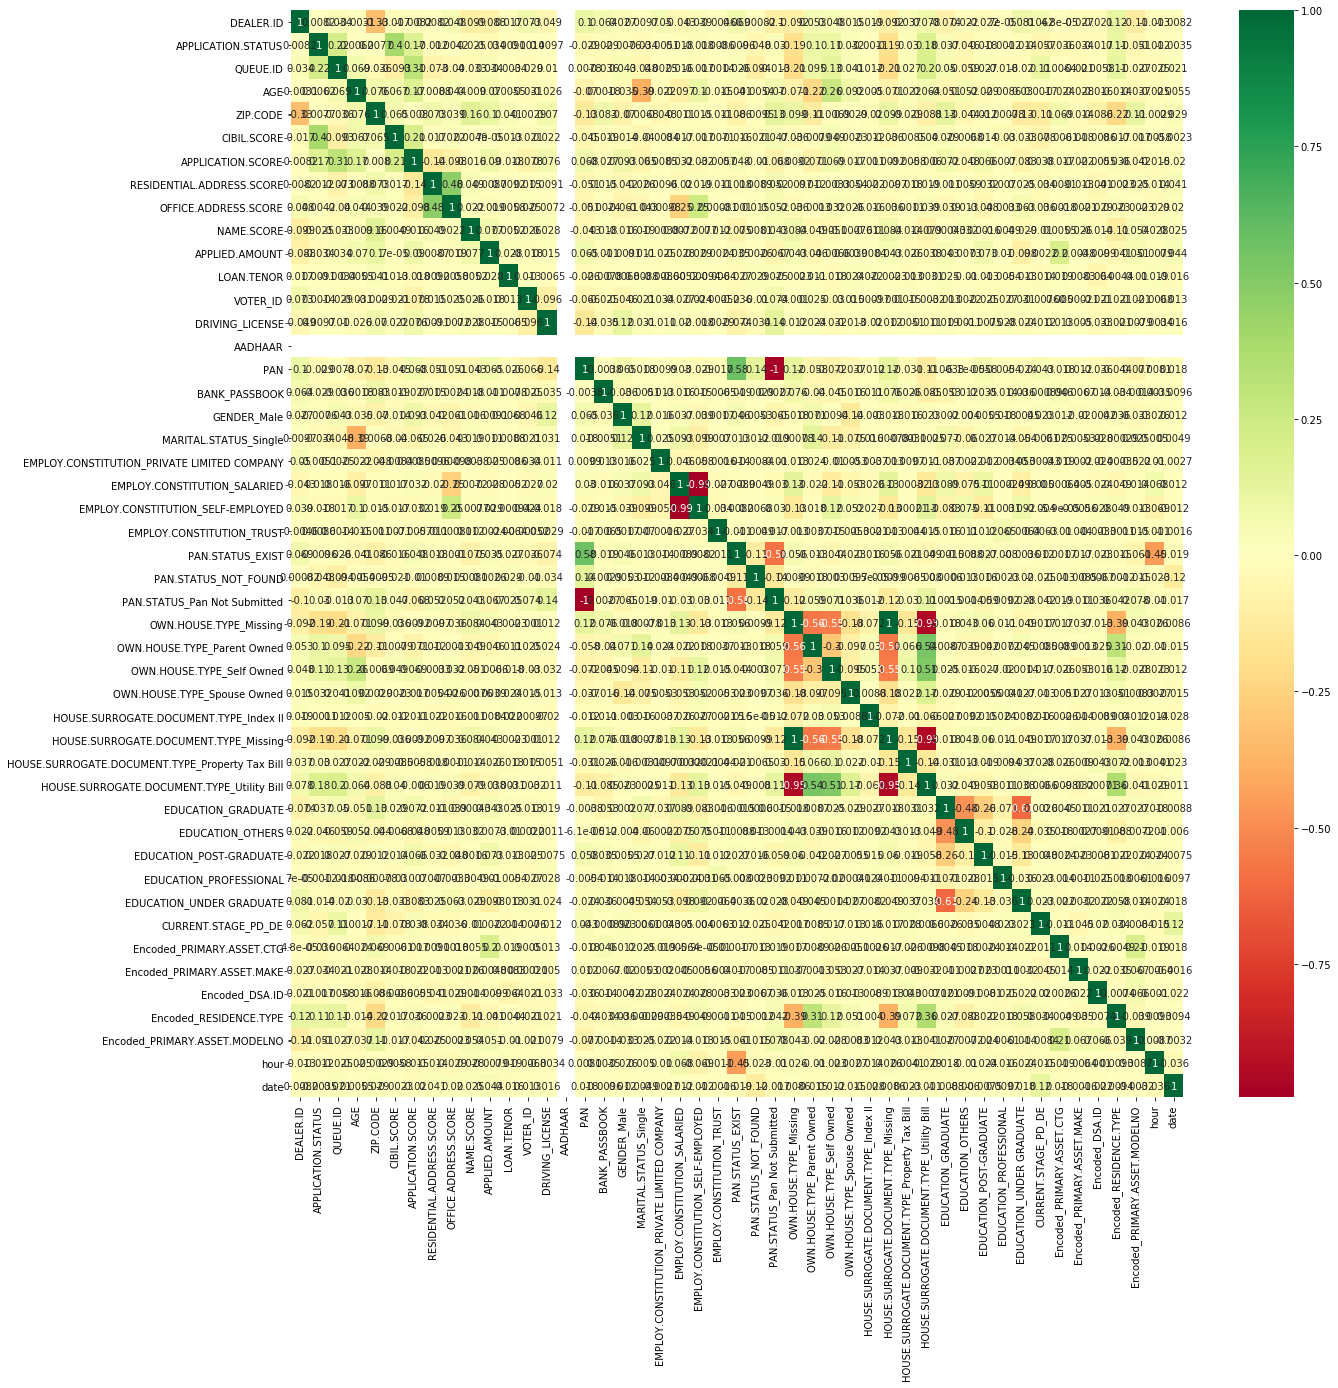

In [55]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df8.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df8[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(x, 0.9)
corr_features

#pan

#emplye constituon salaried
#own house type missing

{'EMPLOY.CONSTITUTION_SELF-EMPLOYED',
 'HOUSE.SURROGATE.DOCUMENT.TYPE_Missing',
 'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill',
 'PAN.STATUS_Pan Not Submitted'}

In [57]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df8)
constant_columns = [column for column in df8.columns
                    if column not in df8.columns[var_thres.get_support()]]

print(len(constant_columns))
for feature in constant_columns:
     print(feature)

1
AADHAAR


In [58]:
df8 = df8.drop(['AADHAAR','DRIVING_LICENSE','PAN.STATUS_Pan Not Submitted','EMPLOY.CONSTITUTION_SELF-EMPLOYED',
                'HOUSE.SURROGATE.DOCUMENT.TYPE_Missing','OWN.HOUSE.TYPE_Missing','PAN.STATUS_EXIST'], axis=1)
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        7759 non-null   int64  
 1   APPLICATION.STATUS                               7759 non-null   int32  
 2   QUEUE.ID                                         7759 non-null   int32  
 3   AGE                                              7759 non-null   int64  
 4   ZIP.CODE                                         7759 non-null   int64  
 5   CIBIL.SCORE                                      7759 non-null   float64
 6   APPLICATION.SCORE                                7759 non-null   float64
 7   RESIDENTIAL.ADDRESS.SCORE                        7759 non-null   float64
 8   OFFICE.ADDRESS.SCORE                             7759 non-null   float64
 9   NAME.SCORE                    

In [59]:
df8.to_csv("E:\\DataScience\\assignment-dataset\\Trainclean.csv",index=False)

In [60]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        7759 non-null   int64  
 1   APPLICATION.STATUS                               7759 non-null   int32  
 2   QUEUE.ID                                         7759 non-null   int32  
 3   AGE                                              7759 non-null   int64  
 4   ZIP.CODE                                         7759 non-null   int64  
 5   CIBIL.SCORE                                      7759 non-null   float64
 6   APPLICATION.SCORE                                7759 non-null   float64
 7   RESIDENTIAL.ADDRESS.SCORE                        7759 non-null   float64
 8   OFFICE.ADDRESS.SCORE                             7759 non-null   float64
 9   NAME.SCORE                    

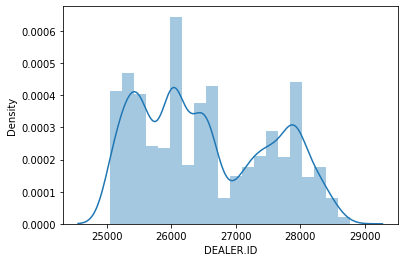

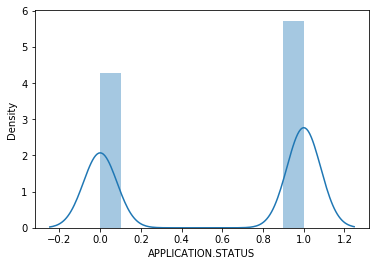

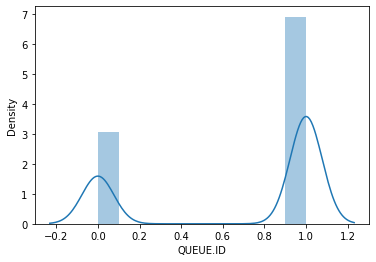

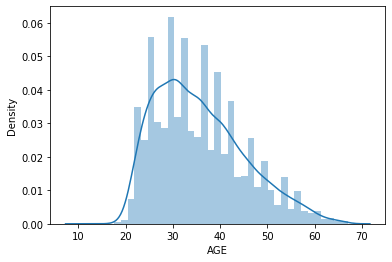

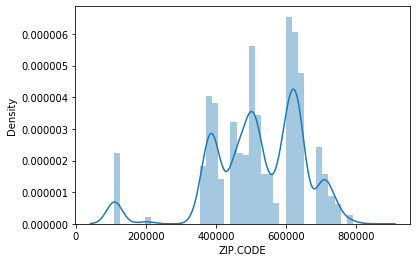

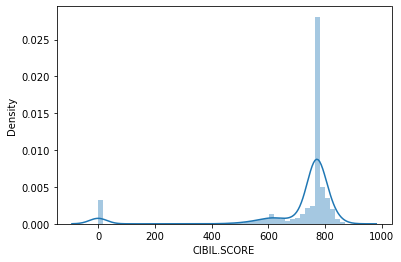

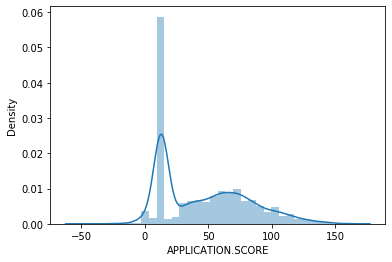

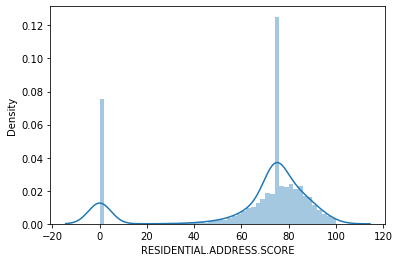

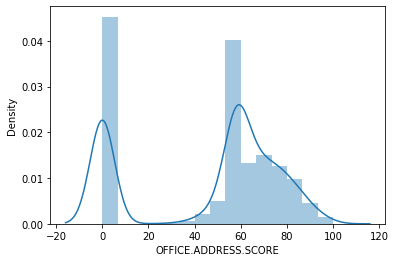

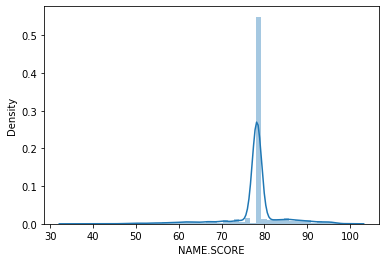

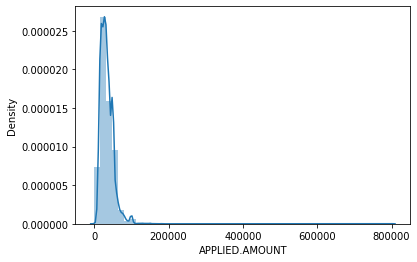

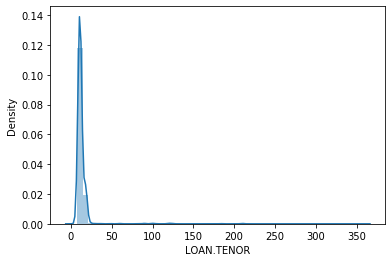

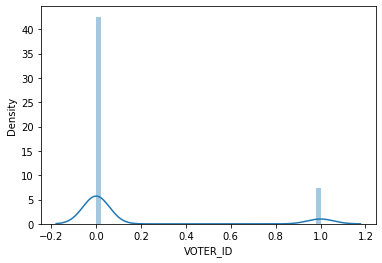

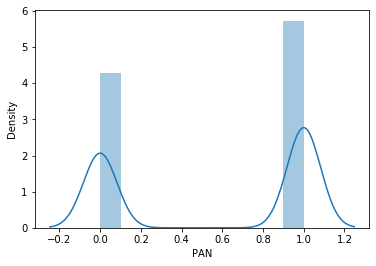

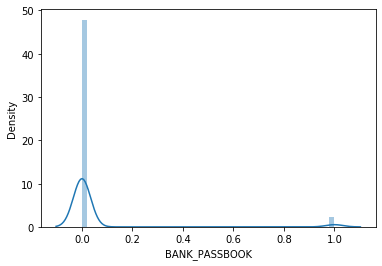

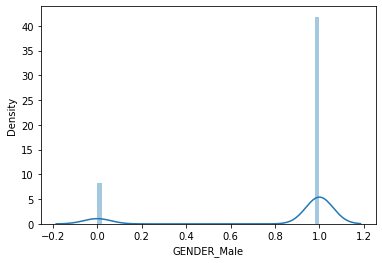

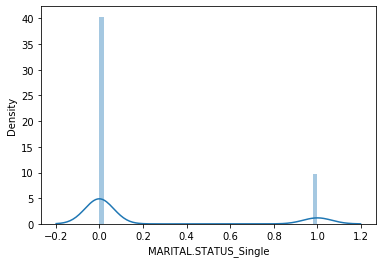

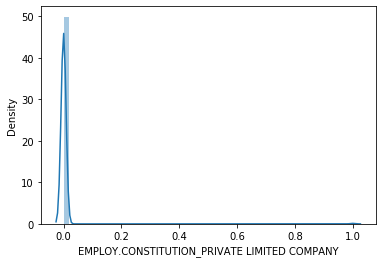

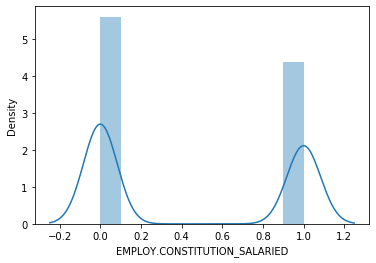

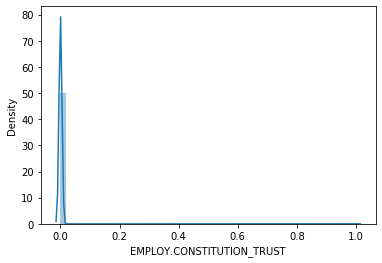

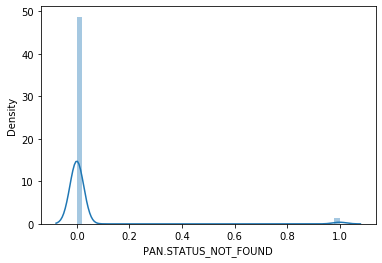

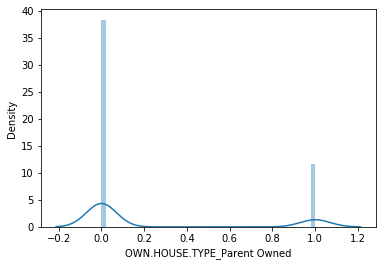

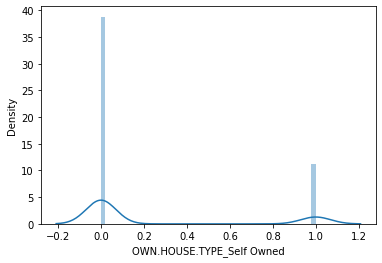

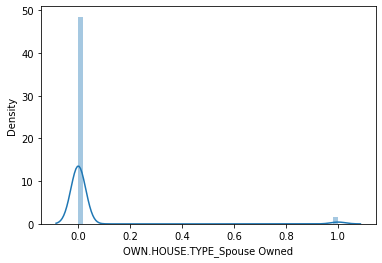

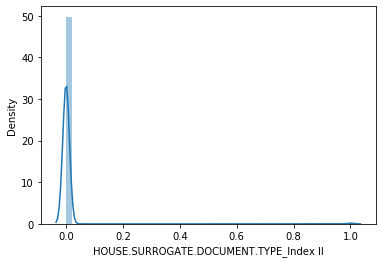

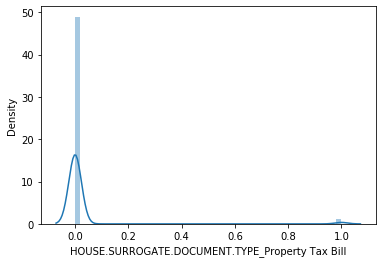

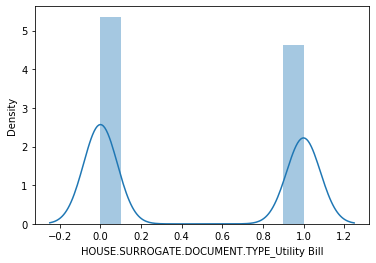

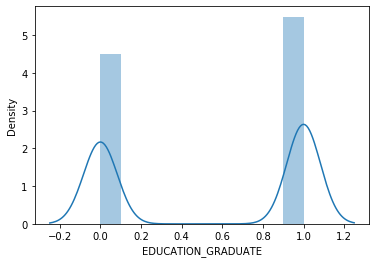

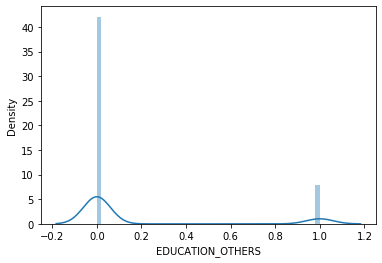

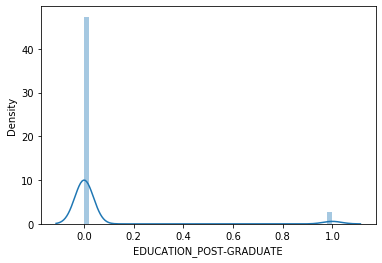

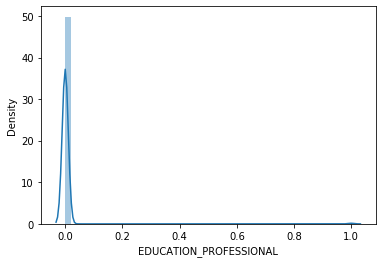

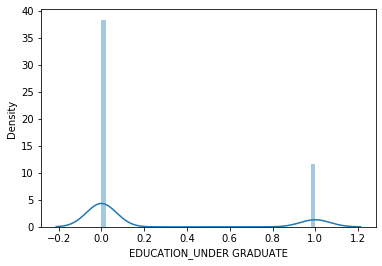

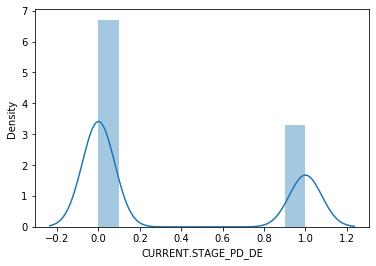

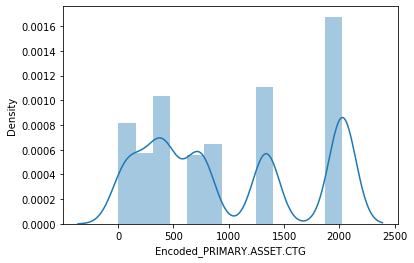

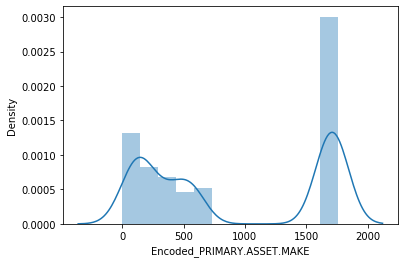

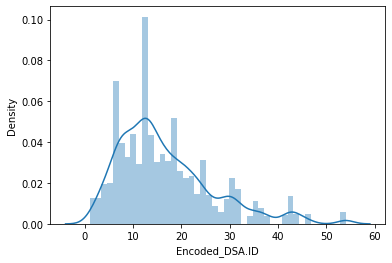

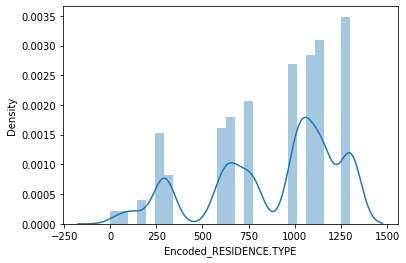

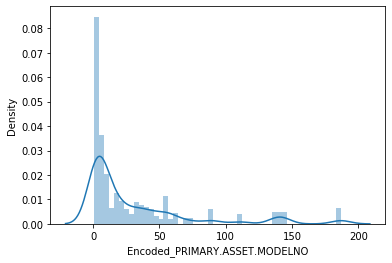

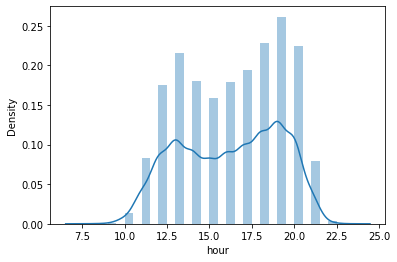

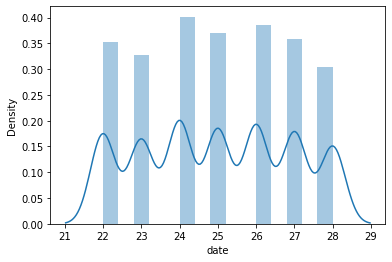

In [61]:
col1 = df8.columns
for i in col1:
    sns.distplot(df8[i])
    plt.show()

In [62]:
for i in col1:
    uppper_boundary=df8[i].mean() + 3* df8[i].std()
    lower_boundary=df8[i].mean() - 3* df8[i].std()
   # print(i, " ", lower_boundary," ",uppper_boundary, " ",df_STP7[i].mean())
    df8_1 = df8[(df8[i]<lower_boundary) & (df8[i]>uppper_boundary)]
    print(i," ",df8_1.shape)

DEALER.ID   (0, 40)
APPLICATION.STATUS   (0, 40)
QUEUE.ID   (0, 40)
AGE   (0, 40)
ZIP.CODE   (0, 40)
CIBIL.SCORE   (0, 40)
APPLICATION.SCORE   (0, 40)
RESIDENTIAL.ADDRESS.SCORE   (0, 40)
OFFICE.ADDRESS.SCORE   (0, 40)
NAME.SCORE   (0, 40)
APPLIED.AMOUNT   (0, 40)
LOAN.TENOR   (0, 40)
VOTER_ID   (0, 40)
PAN   (0, 40)
BANK_PASSBOOK   (0, 40)
GENDER_Male   (0, 40)
MARITAL.STATUS_Single   (0, 40)
EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY   (0, 40)
EMPLOY.CONSTITUTION_SALARIED   (0, 40)
EMPLOY.CONSTITUTION_TRUST   (0, 40)
PAN.STATUS_NOT_FOUND   (0, 40)
OWN.HOUSE.TYPE_Parent Owned   (0, 40)
OWN.HOUSE.TYPE_Self Owned   (0, 40)
OWN.HOUSE.TYPE_Spouse Owned   (0, 40)
HOUSE.SURROGATE.DOCUMENT.TYPE_Index II   (0, 40)
HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill   (0, 40)
HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill   (0, 40)
EDUCATION_GRADUATE   (0, 40)
EDUCATION_OTHERS   (0, 40)
EDUCATION_POST-GRADUATE   (0, 40)
EDUCATION_PROFESSIONAL   (0, 40)
EDUCATION_UNDER GRADUATE   (0, 40)
CURRENT.STAGE_

In [63]:
for i in col1:
    IQR=df8[i].quantile(0.75)-df8[i].quantile(0.25)
    lower_bridge=df8[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df8[i].quantile(0.75)+(IQR*1.5)
    print(lower_bridge), print(upper_bridge)
    df8_2 = df8[(df8[i]<lower_bridge) & (df8[i]>upper_bridge)]
    print(i," ",df8_2.shape)

22872.75
30266.75
DEALER.ID   (0, 40)
-1.5
2.5
APPLICATION.STATUS   (0, 40)
-1.5
2.5
QUEUE.ID   (0, 40)
7.0
63.0
AGE   (0, 40)
192478.5
884538.5
ZIP.CODE   (0, 40)
698.5
822.5
CIBIL.SCORE   (0, 40)
-77.0
163.0
APPLICATION.SCORE   (0, 40)
41.53250000000002
104.39249999999998
RESIDENTIAL.ADDRESS.SCORE   (0, 40)
-103.755
172.925
OFFICE.ADDRESS.SCORE   (0, 40)
78.26
78.26
NAME.SCORE   (0, 40)
-13305.0
78175.0
APPLIED.AMOUNT   (0, 40)
7.0
15.0
LOAN.TENOR   (0, 40)
0.0
0.0
VOTER_ID   (0, 40)
-1.5
2.5
PAN   (0, 40)
0.0
0.0
BANK_PASSBOOK   (0, 40)
1.0
1.0
GENDER_Male   (0, 40)
0.0
0.0
MARITAL.STATUS_Single   (0, 40)
0.0
0.0
EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY   (0, 40)
-1.5
2.5
EMPLOY.CONSTITUTION_SALARIED   (0, 40)
0.0
0.0
EMPLOY.CONSTITUTION_TRUST   (0, 40)
0.0
0.0
PAN.STATUS_NOT_FOUND   (0, 40)
0.0
0.0
OWN.HOUSE.TYPE_Parent Owned   (0, 40)
0.0
0.0
OWN.HOUSE.TYPE_Self Owned   (0, 40)
0.0
0.0
OWN.HOUSE.TYPE_Spouse Owned   (0, 40)
0.0
0.0
HOUSE.SURROGATE.DOCUMENT.TYPE_Index II   (0, 40

In [64]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        7759 non-null   int64  
 1   APPLICATION.STATUS                               7759 non-null   int32  
 2   QUEUE.ID                                         7759 non-null   int32  
 3   AGE                                              7759 non-null   int64  
 4   ZIP.CODE                                         7759 non-null   int64  
 5   CIBIL.SCORE                                      7759 non-null   float64
 6   APPLICATION.SCORE                                7759 non-null   float64
 7   RESIDENTIAL.ADDRESS.SCORE                        7759 non-null   float64
 8   OFFICE.ADDRESS.SCORE                             7759 non-null   float64
 9   NAME.SCORE                    

In [65]:
x = df8.drop(['APPLICATION.STATUS','QUEUE.ID'],axis=1)
y =df8['APPLICATION.STATUS']


In [66]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)


In [67]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(6207, 38)
(1552, 38)
(6207,)
(1552,)


In [68]:
#df9=pd.DataFrame(scaler.fit(train_X),columns=train_X.columns)
#df_test = pd.DataFrame(scaler.transform(train_y))
#df9.head()
#u =scaler.fit(train_X)
#train_X_scaled = u.transform(train_X)
#test_X_scaled=u.transform(test_X)
#df_train=pd.DataFrame(train_X_scaled,columns=train_X.columns)
#df_test=pd.DataFrame(test_X_scaled,columns=test_X.columns)

'''scaler = StandardScaler() # create an object
X_trainUW_scaled = scaler.fit_transform(train_XUW) # fit the scaler to the train set, and then transform it
X_testUW_scaled = scaler.transform(test_XUW)


X_trainSTP_scaled = scaler.fit_transform(train_XSTP) # fit the scaler to the train set, and then transform it
X_testSTP_scaled = scaler.transform(test_XSTP)

df_trainSTP=pd.DataFrame(X_trainSTP_scaled,columns=train_XSTP.columns)
df_testSTP=pd.DataFrame(X_testSTP_scaled,columns=test_XSTP.columns)

df_trainUW=pd.DataFrame(X_trainUW_scaled,columns=train_XUW.columns)
df_testUW=pd.DataFrame(X_testUW_scaled,columns=test_XUW.columns)

'''
df_train=train_X
df_test=test_X





In [69]:
df_train.shape

(6207, 38)

In [70]:
df_test.shape

(1552, 38)

# Shruti

In [71]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [72]:
#x= df9

In [73]:
df_train.columns

Index(['DEALER.ID', 'AGE', 'ZIP.CODE', 'CIBIL.SCORE', 'APPLICATION.SCORE',
       'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE',
       'APPLIED.AMOUNT', 'LOAN.TENOR', 'VOTER_ID', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_TRUST',
       'PAN.STATUS_NOT_FOUND', 'OWN.HOUSE.TYPE_Parent Owned',
       'OWN.HOUSE.TYPE_Self Owned', 'OWN.HOUSE.TYPE_Spouse Owned',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill', 'EDUCATION_GRADUATE',
       'EDUCATION_OTHERS', 'EDUCATION_POST-GRADUATE', 'EDUCATION_PROFESSIONAL',
       'EDUCATION_UNDER GRADUATE', 'CURRENT.STAGE_PD_DE',
       'Encoded_PRIMARY.ASSET.CTG', 'Encoded_PRIMARY.ASSET.MAKE',
       'Encoded_DSA.ID', 'Encoded_RESIDENCE.TYPE',
       'Encoded_PRIMARY.ASSET.MODELNO', '

In [74]:
#features_rank1=features_rank[features_rank['Score']<0.1]
#features_rank1[0].unique()

In [75]:
#df8 = df7.drop(['MARITAL.STATUS_Single', 'EMPLOY.CONSTITUTION_SELF-EMPLOYED','OWN.HOUSE.TYPE_Spouse Owned','HOUSE.SURROGATE.DOCUMENT.TYPE_Missing', 'EDUCATION_POST-GRADUATE', 'CURRENT.STAGE_LOS_DISB','date'],axis =1)
#df8.columns

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6207 entries, 2774 to 654
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        6207 non-null   int64  
 1   AGE                                              6207 non-null   int64  
 2   ZIP.CODE                                         6207 non-null   int64  
 3   CIBIL.SCORE                                      6207 non-null   float64
 4   APPLICATION.SCORE                                6207 non-null   float64
 5   RESIDENTIAL.ADDRESS.SCORE                        6207 non-null   float64
 6   OFFICE.ADDRESS.SCORE                             6207 non-null   float64
 7   NAME.SCORE                                       6207 non-null   float64
 8   APPLIED.AMOUNT                                   6207 non-null   int64  
 9   LOAN.TENOR                  

In [77]:
df_train= df_train.filter(['DEALER.ID', 'AGE', 'ZIP.CODE', 'CIBIL.SCORE', 'APPLICATION.SCORE',
       'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE',
       'APPLIED.AMOUNT', 'LOAN.TENOR', 'VOTER_ID', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_TRUST',
       'PAN.STATUS_NOT_FOUND', 'OWN.HOUSE.TYPE_Parent Owned',
       'OWN.HOUSE.TYPE_Self Owned', 'OWN.HOUSE.TYPE_Spouse Owned',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill', 'EDUCATION_GRADUATE',
       'EDUCATION_OTHERS', 'EDUCATION_POST-GRADUATE', 'EDUCATION_PROFESSIONAL',
       'EDUCATION_UNDER GRADUATE', 'CURRENT.STAGE_PD_DE',
       'Encoded_PRIMARY.ASSET.CTG', 'Encoded_PRIMARY.ASSET.MAKE',
       'Encoded_DSA.ID', 'Encoded_RESIDENCE.TYPE',
       'Encoded_PRIMARY.ASSET.MODELNO', 'hour', 'date'], axis=1)

In [78]:
df_test= df_test.filter(['DEALER.ID', 'AGE', 'ZIP.CODE', 'CIBIL.SCORE', 'APPLICATION.SCORE',
       'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE',
       'APPLIED.AMOUNT', 'LOAN.TENOR', 'VOTER_ID', 'PAN', 'BANK_PASSBOOK',
       'GENDER_Male', 'MARITAL.STATUS_Single',
       'EMPLOY.CONSTITUTION_PRIVATE LIMITED COMPANY',
       'EMPLOY.CONSTITUTION_SALARIED', 'EMPLOY.CONSTITUTION_TRUST',
       'PAN.STATUS_NOT_FOUND', 'OWN.HOUSE.TYPE_Parent Owned',
       'OWN.HOUSE.TYPE_Self Owned', 'OWN.HOUSE.TYPE_Spouse Owned',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Index II',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Property Tax Bill',
       'HOUSE.SURROGATE.DOCUMENT.TYPE_Utility Bill', 'EDUCATION_GRADUATE',
       'EDUCATION_OTHERS', 'EDUCATION_POST-GRADUATE', 'EDUCATION_PROFESSIONAL',
       'EDUCATION_UNDER GRADUATE', 'CURRENT.STAGE_PD_DE',
       'Encoded_PRIMARY.ASSET.CTG', 'Encoded_PRIMARY.ASSET.MAKE',
       'Encoded_DSA.ID', 'Encoded_RESIDENCE.TYPE',
       'Encoded_PRIMARY.ASSET.MODELNO', 'hour', 'date'], axis=1)


In [79]:
#df9.to_csv("E:\\DataScience\\assignment-dataset\\trainclean.csv")

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 4146 to 1700
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DEALER.ID                                        1552 non-null   int64  
 1   AGE                                              1552 non-null   int64  
 2   ZIP.CODE                                         1552 non-null   int64  
 3   CIBIL.SCORE                                      1552 non-null   float64
 4   APPLICATION.SCORE                                1552 non-null   float64
 5   RESIDENTIAL.ADDRESS.SCORE                        1552 non-null   float64
 6   OFFICE.ADDRESS.SCORE                             1552 non-null   float64
 7   NAME.SCORE                                       1552 non-null   float64
 8   APPLIED.AMOUNT                                   1552 non-null   int64  
 9   LOAN.TENOR                 

In [81]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [82]:
paramsXGB={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 1,2,3, 4, 5, 6, 8, 10, 12, 15,20],
    "min_split_loss": [ 0.0, 0.1, 0.2 , 0.3, 0.4,1,4,5,6 ],
 "min_child_weight" : [ 1, 3, 5, 7,9,10],
 
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "reg_lamdba"     : [1,2,3,4,6,7,10],
    "subsample"      :[0.1,0.3,0.5,0.7,0.9,1],
    "eta"           : [0.01,0.03,0.05,0.04, 0.3, 0.5, 0.1,0.2,0.6,0.7],
   
    "n_estimators" : [100, 200, 40, 50, 300 ,400, 75]
    
}

paramsRF={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':(3,6,9),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[1,3, 5,10],
                'max_depth' : [int(x) for x in np.linspace(5, 30, num = 6)],
           'min_samples_split' : [2, 5, 10, 15, 100]
              }

paramsSVC= [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2]}]

paramsGB = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [1,3,4,8],
    "min_samples_split": [3,5,8,9],
    "learning_rate": [0.01,0.03,0.04, 0.1]
    
}
paramsLR={'C':[1,5,10,100],'penalty':['l1','l2']}

param=[paramsXGB,paramsLR,paramsRF,paramsGB]
param[0]

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20],
 'min_split_loss': [0.0, 0.1, 0.2, 0.3, 0.4, 1, 4, 5, 6],
 'min_child_weight': [1, 3, 5, 7, 9, 10],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'reg_lamdba': [1, 2, 3, 4, 6, 7, 10],
 'subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
 'eta': [0.01, 0.03, 0.05, 0.04, 0.3, 0.5, 0.1, 0.2, 0.6, 0.7],
 'n_estimators': [100, 200, 40, 50, 300, 400, 75]}

In [83]:
classifierXGB=xgb.XGBClassifier()
ClassifierLog = LogisticRegression()

ClassifierRF = RandomForestClassifier()
classifierGB=GradientBoostingClassifier()

models=[classifierXGB,ClassifierLog,ClassifierRF,classifierGB]


In [84]:
for i in range(0,4):
    random_search=RandomizedSearchCV(models[i],param_distributions=param[i],n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
    start_time = timer(None)
    random_search.fit(df_train,train_y)
    timer(start_time)
    print(models[i],"  ",random_search.best_score_)
    print(models[i],"  ",random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.0s finished


[23:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "reg_lamdba" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 23.28 seconds.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.9s finished



 Time taken: 0 hours 0 minutes and 1.17 seconds.
LogisticRegression()    0.802255368892299
LogisticRegression()    {'penalty': 'l2', 'C': 10}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.7s finished



 Time taken: 0 hours 0 minutes and 37.77 seconds.
RandomForestClassifier()    0.9209704528185977
RandomForestClassifier()    {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished



 Time taken: 0 hours 1 minutes and 16.42 seconds.
GradientBoostingClassifier()    0.9222803092700802
GradientBoostingClassifier()    {'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.03}


In [85]:

classifierXGB1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
min_split_loss=5,
       colsample_bytree=0.3, 
       max_delta_step=0, max_depth=10, min_child_weight=10, missing=1,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
        scale_pos_weight=.55, seed=None, silent=True,
learning_rate= 0.25,
       subsample=.9,reg_lamdba=2,eta= 0.3)

ClassifierLog1 = LogisticRegression(C=100,penalty='l2')

ClassifierRF1 = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 5,
 min_samples_leaf= 3,
 max_features= 9,
 max_depth= 15,
 criterion= 'entropy',
 bootstrap= False,
 n_jobs=-1)
classifierGB1=GradientBoostingClassifier(n_estimators= 500,
 min_samples_split= 3,
 max_depth= 8,
 learning_rate= 0.01)

models1=[classifierXGB1,ClassifierLog1,ClassifierRF1,classifierGB1]

[23:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "reg_lamdba", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classifierXGB1  Test accuracy:0.8324742268041238
classifierXGB1  Train roc-auc:0.8837001107360545
classifierXGB1  Test roc-auc: 0.8319494192988169
classifierXGB1  confusion Matrix
[[550 114]
 [146 742]]
classifierXGB1  classification_report 
              precision    recall  f1-score   su

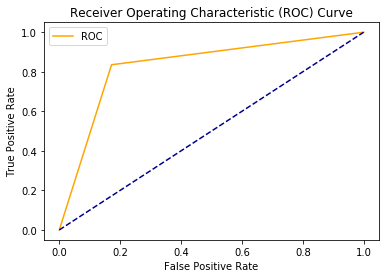

ClassifierLog1  Test accuracy:0.7326030927835051
ClassifierLog1  Train roc-auc:0.7144832073639158
ClassifierLog1  Test roc-auc: 0.7064948985129709
ClassifierLog1  confusion Matrix
[[349 315]
 [100 788]]
ClassifierLog1  classification_report 
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       664
           1       0.71      0.89      0.79       888

    accuracy                           0.73      1552
   macro avg       0.75      0.71      0.71      1552
weighted avg       0.74      0.73      0.72      1552



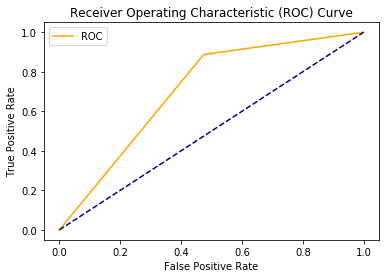

ClassifierRF1  Test accuracy:0.8382731958762887
ClassifierRF1  Train roc-auc:0.9813369041099549
ClassifierRF1  Test roc-auc: 0.8288491805058069
ClassifierRF1  confusion Matrix
[[507 157]
 [ 94 794]]
ClassifierRF1  classification_report 
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       664
           1       0.83      0.89      0.86       888

    accuracy                           0.84      1552
   macro avg       0.84      0.83      0.83      1552
weighted avg       0.84      0.84      0.84      1552



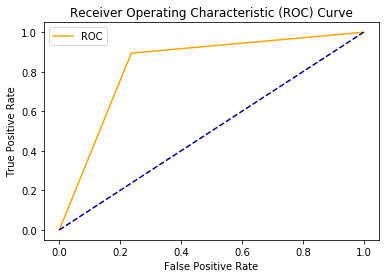

classifierGB1  Test accuracy:0.8292525773195877
classifierGB1  Train roc-auc:0.96304844082236
classifierGB1  Test roc-auc: 0.819826603712146
classifierGB1  confusion Matrix
[[501 163]
 [102 786]]
classifierGB1  classification_report 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       664
           1       0.83      0.89      0.86       888

    accuracy                           0.83      1552
   macro avg       0.83      0.82      0.82      1552
weighted avg       0.83      0.83      0.83      1552



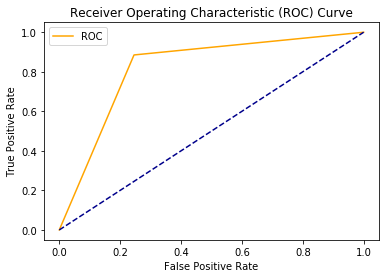

In [86]:
mod=['classifierXGB1','ClassifierLog1','ClassifierRF1','classifierGB1']

for i in range(0,4):
    m = models1[i].fit(df_train,train_y)
    predTest=m.predict(test_X)
    predTrain=m.predict(df_train)
    #predict_proba_train = m.predict_proba(df_train)
    #predict_proba_test = m.predict_proba(df_test)
    accuracyTest = accuracy_score(test_y,predTest)
    print(mod[i],' Test accuracy:{}'.format(accuracyTest) )
    print(mod[i],' Train roc-auc:{}'.format(roc_auc_score(train_y, predTrain)))
    print(mod[i],' Test roc-auc: {}'.format(roc_auc_score(test_y, predTest)))
    conf_mat = confusion_matrix(test_y,predTest)
    print(mod[i]," confusion Matrix")
    print(conf_mat)
    print(mod[i]," classification_report ")
    print(classification_report(test_y,predTest))
    
    with open('E:\\DataScience\\assignment-dataset\\model_pickle_Gen_'+mod[i],'wb') as file:
        pickle.dump(m,file)
        
    fpr, tpr, threshold = roc_curve(test_y,predTest)
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    plot_roc_curve(fpr,tpr)
    

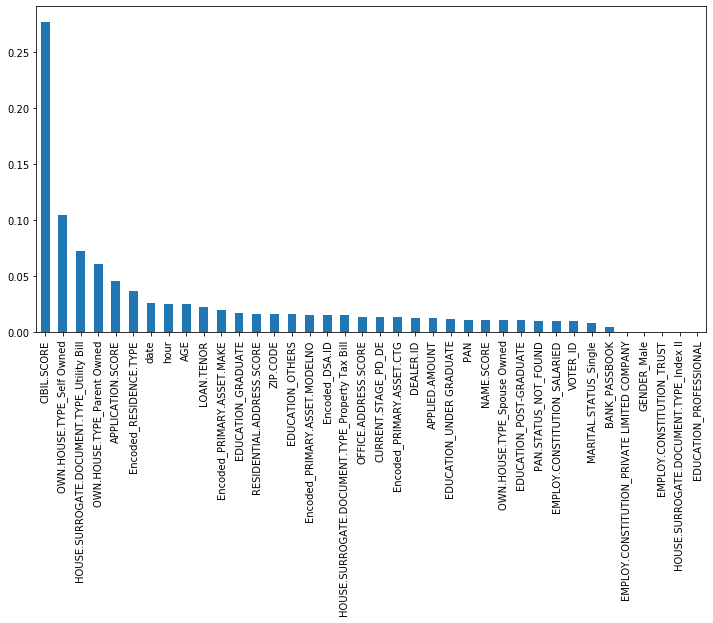

In [87]:
importance = pd.Series(classifierXGB1.feature_importances_)
importance.index = df_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

In [90]:
import lime
from lime import lime_tabular

In [92]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(df_train),
    feature_names=df_train.columns,
    mode='classification'
)

exp = interpretor.explain_instance(
    data_row=df_test.iloc[5], ##new data
    predict_fn=classifierXGB1.predict_proba
)


exp.show_in_notebook(show_table=True)